CAPSTONE
Battle of the Neighborhoods
Afghan  Restaurants
vinayak 
-------------------------------------------------------------------------------------------------------
# Introduction
This final project explores the best locations for Afghan restaurants throughout the city of New York.New York is a major metropolitan area with more than 8 million(2016) people living within city limits.Due to the many wars and ongoing fights with the taliban there are a number of asylum seekers coming into New York who need jobs and food. This report explores which neighborhoods and boroughs of New York have the most as well as the best Afghan restaurants, to help people who have come from a war torn country feel a little accepted. 

# Additionally, I will attempt to answer the questions “Where should I open an Afghan Restaurant ?” and “Where should I stay If I want great Afghan food?”

# Data
In order to answer the above questions, data on New York City neighbourhoods, boroughs to include boundaries, latitude, longitude, restaurants, and restaurant ratings and tips are required.

New York City data containing the neighborhoods and boroughs, latitudes, and longitudes will be obtained from the data source: 
https://cocl.us/new_york_dataset
All data related to locations and quality of Afghan restaurants will be obtained via the FourSquare API utilized via the Request library in Python.

# Methodology
• Data will be collected from https://cocl.us/new_york_dataset and cleaned and processed into a dataframe and New York City data containing neighborhood boundaries will be obtained from the data source: https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm

• FourSquare be used to locate all venues and then filtered by Afghan restaurants. Ratings, tips, and likes by users will be counted and added to the dataframe.

• Data will be sorted based on rankings

• Finally, the data be will be visually assessed using graphing from various Python libraries.

# Problem Statement
What is / are the best location(s) for Afghan cuisine in New York City?
In what Neighborhood and/or borough should I open an Afghan restaurant to have the best chance of being successful?
Where would I go in New York City to have the best Afghan food?

# Note: When only searching for Afghan Restaurants using the foursquare API only three resaurants come in.

Required Libraries.

pandas and numpy for handling data.

request module for using FourSquare API.

geopy to get co-ordinates of City of New York.

folium to visualize the results on a map

In [1]:
import pandas as pd
import numpy as np
import requests
#from bs4 import BeautifulSoup
import os
#!conda install -c conda-forge folium=0.5.0 --yes
import folium 
#!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import seaborn as sns

print('Done!')

Done!


Now we define a function to get the geocodes i.e latitude and longitude of a given location using geopy.

We define a function to intract with FourSquare API and get top 100 venues within a radius of 1000 metres for a given latitude and longitude. Below function will return us the venue id , venue name and category.

we will define a function to get venue details like like count , rating , tip counts for a given venue id. This will be used for ranking.

we define a funtion to get the new york city data such as Boroughs, Neighborhoods along with their latitude and longitude.

In [2]:
CLIENT_ID='MPNZW1JMOGKIWYGSX44YXHEM5PTERXBKXMNXRTTQFA0OPF34'
CLIENT_SECRET='KQLROJFT04T5WNLJZC1HU5EH1C5HQHFHVC42NOIAL31ZUYNI'
VERSION='20180605'
def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


def get_venues(lat,lng):
    #set variables
    radius=400
    LIMIT=100
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_venue_details(venue_id):
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    # get all the data
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df


def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    return new_york_data

We will call the above funtion to get the new york city data.



In [3]:
ny_data = get_new_york_data()
ny_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [4]:
ny_data.shape


(306, 4)

So there are total of 306 different Neighborhoods in New York



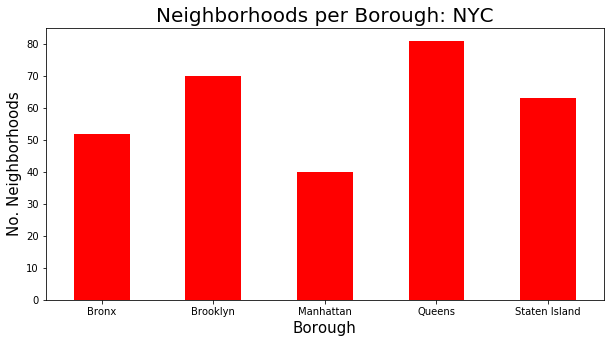

In [80]:
clr = "red"
ny_data.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(10,5), color=clr)
plt.title('Neighborhoods per Borough: NYC', fontsize = 20)
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('No. Neighborhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.show()


We see that Queens has highest number of neighborhoods

# The API interface for some reason does not work more than once on PC in India, even though I wanted to add Halal restaurants as well I was not able to

In [11]:
# queens has most neighborhoods
# prepare neighborhood list that contains Afghan resturants
column_names=['Borough', 'Neighborhood', 'ID','Name']
afghan_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in ny_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    afghan_resturants=venues[venues['Category']=='Afghan Restaurant']   
    print('(',count,'/',len(ny_data),')','Afghan Resturants in '+Neighborhood+', '+Borough+':'+str(len(afghan_resturants)))
    print(row)
    for resturant_detail in afghan_resturants.values.tolist():
        id, name , category=resturant_detail
        afghan_rest_ny = afghan_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Afghan Resturants in Wakefield, Bronx:0
['Bronx', 'Wakefield', 40.89470517661, -73.84720052054902]
( 2 / 306 ) Afghan Resturants in Co-op City, Bronx:0
['Bronx', 'Co-op City', 40.87429419303012, -73.82993910812398]
( 3 / 306 ) Afghan Resturants in Eastchester, Bronx:0
['Bronx', 'Eastchester', 40.887555677350775, -73.82780644716412]
( 4 / 306 ) Afghan Resturants in Fieldston, Bronx:0
['Bronx', 'Fieldston', 40.89543742690383, -73.90564259591682]
( 5 / 306 ) Afghan Resturants in Riverdale, Bronx:0
['Bronx', 'Riverdale', 40.890834493891305, -73.9125854610857]
( 6 / 306 ) Afghan Resturants in Kingsbridge, Bronx:0
['Bronx', 'Kingsbridge', 40.88168737120521, -73.90281798724604]
( 7 / 306 ) Afghan Resturants in Marble Hill, Manhattan:0
['Manhattan', 'Marble Hill', 40.87655077879964, -73.91065965862981]
( 8 / 306 ) Afghan Resturants in Woodlawn, Bronx:0
['Bronx', 'Woodlawn', 40.89827261213805, -73.86731496814176]
( 9 / 306 ) Afghan Resturants in Norwood, Bronx:0
['Bronx', 'Norwood',

### So we got data for all resturants Now lets save this data to a csv sheet. In case we by mistake modify it. As the API server does not work all the time, we will refer to saved data sheet csv if required

In [19]:
afghan_rest_ny.to_csv('afghan_rest_ny_tocsv1.csv',index=False) # Save the information so far to a .csv file due to limited calls on FourSquare

In [13]:
afghan_rest_ny.head()

,Borough,Neighborhood,ID,Name
0,Manhattan,Lenox Hill,4b22ec71f964a520685024e3,Afghan Kebab House II
1,Queens,Ravenswood,582a1b095f78034bcfb69186,Sami's Kebab House
2,Queens,Utopia,4b6740aaf964a520fb432be3,Bakhter Afghan Halal Kababs


As we continue our analysis, we see that Queens has the highest number of Afghan restaurants.(which we can show using a plot as below)

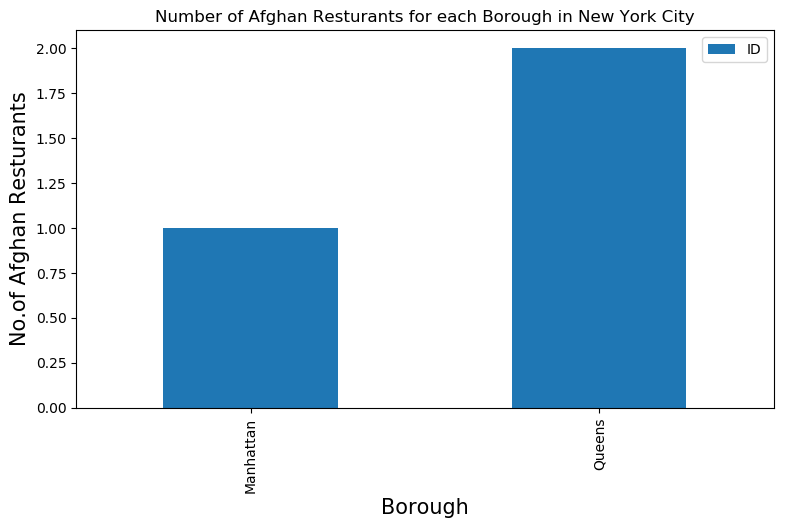

In [14]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Afghan Resturants for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Afghan Resturants', fontsize=15)
#giving a bar plot
afghan_rest_ny.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

We can see from the plot below that there are three Neighborhoods in New York which provide Afghan Food, hence these are the neighborhoods would want to go for for Afghan Food.

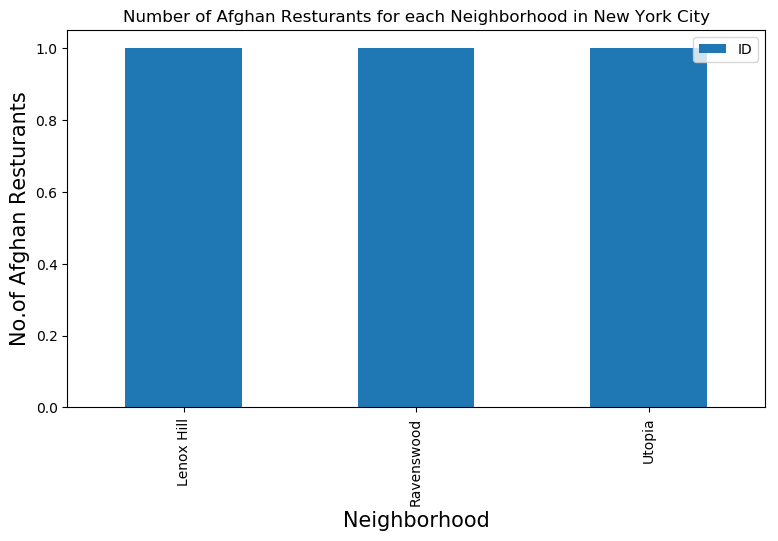

In [15]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Afghan Resturants for each Neighborhood in New York City')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Afghan Resturants', fontsize=15)
#giving a bar plot
afghan_rest_ny.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

## Now we will get the ranking of each resturant for further analysis.



In [17]:
# prepare neighborhood list that contains afghan resturants
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
afghan_rest_stats_ny=pd.DataFrame(columns=column_names)
count=1


for row in afghan_rest_ny.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(afghan_rest_ny),')','processed')
    afghan_rest_stats_ny = afghan_rest_stats_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1


{'meta': {'code': 200, 'requestId': '5ebeec3b69babe001b11bcdb'}, 'response': {'venue': {'id': '4b22ec71f964a520685024e3', 'name': 'Afghan Kebab House II', 'contact': {'phone': '7188139556', 'formattedPhone': '(718) 813-9556', 'twitter': 'kebabhouseii', 'facebook': '1014488891970711', 'facebookName': 'Afghan Kebab House II'}, 'location': {'address': '1345 2nd Ave', 'crossStreet': 'btw. 70th and 71st St', 'lat': 40.76802139999999, 'lng': -73.95915719999999, 'labeledLatLngs': [{'label': 'display', 'lat': 40.76802139999999, 'lng': -73.95915719999999}], 'postalCode': '10021', 'cc': 'US', 'city': 'New York', 'state': 'NY', 'country': 'United States', 'formattedAddress': ['1345 2nd Ave (btw. 70th and 71st St)', 'New York, NY 10021', 'United States']}, 'canonicalUrl': 'https://foursquare.com/v/afghan-kebab-house-ii/4b22ec71f964a520685024e3', 'categories': [{'id': '503288ae91d4c4b30a586d67', 'name': 'Afghan Restaurant', 'pluralName': 'Afghan Restaurants', 'shortName': 'Afghan', 'icon': {'prefix

In [18]:
afghan_rest_stats_ny.head()

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Manhattan,Lenox Hill,4b22ec71f964a520685024e3,Afghan Kebab House II,19,7.8,11
1,Queens,Ravenswood,582a1b095f78034bcfb69186,Sami's Kebab House,17,7.7,3
2,Queens,Utopia,4b6740aaf964a520fb432be3,Bakhter Afghan Halal Kababs,23,7.3,21


So we got data for all resturants Now lets save this data to a csv sheet. In case we by mistake modify it. As the number of calls to get details for venue are premium call and have limit of 500 per day(and the API server does not work all the time), we will refer to saved data sheet csv if required

In [20]:
afghan_rest_stats_ny.to_csv('afghan_rest_stats_ny.csv', index=False)

Lets verify the data from saved csv file



In [22]:
afghan_rest_stats_ny_csv=pd.read_csv('afghan_rest_stats_ny.csv')


In [24]:
afghan_rest_stats_ny_csv.head()


,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Manhattan,Lenox Hill,4b22ec71f964a520685024e3,Afghan Kebab House II,19,7.8,11
1,Queens,Ravenswood,582a1b095f78034bcfb69186,Sami's Kebab House,17,7.7,3
2,Queens,Utopia,4b6740aaf964a520fb432be3,Bakhter Afghan Halal Kababs,23,7.3,21


In [25]:
afghan_rest_stats_ny.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 7 columns):
Borough         3 non-null object
Neighborhood    3 non-null object
ID              3 non-null object
Name            3 non-null object
Likes           3 non-null object
Rating          3 non-null float64
Tips            3 non-null object
dtypes: float64(1), object(6)
memory usage: 248.0+ bytes


We see that the values such as likes and tips are in the form of a string, we will convert them to float type for further analysis.

In [26]:
afghan_rest_stats_ny['Likes']=afghan_rest_stats_ny['Likes'].astype('float64')
afghan_rest_stats_ny['Tips']=afghan_rest_stats_ny['Tips'].astype('float64')


In [27]:
afghan_rest_stats_ny.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 7 columns):
Borough         3 non-null object
Neighborhood    3 non-null object
ID              3 non-null object
Name            3 non-null object
Likes           3 non-null float64
Rating          3 non-null float64
Tips            3 non-null float64
dtypes: float64(3), object(4)
memory usage: 248.0+ bytes


In [28]:
# Resturant with maximum Likes
afghan_rest_stats_ny.iloc[afghan_rest_stats_ny['Likes'].idxmax()]

Borough                              Queens
Neighborhood                         Utopia
ID                 4b6740aaf964a520fb432be3
Name            Bakhter Afghan Halal Kababs
Likes                                    23
Rating                                  7.3
Tips                                     21
Name: 2, dtype: object

In [29]:
# Resturant with maximum Rating
afghan_rest_stats_ny.iloc[afghan_rest_stats_ny['Rating'].idxmax()]

Borough                        Manhattan
Neighborhood                  Lenox Hill
ID              4b22ec71f964a520685024e3
Name               Afghan Kebab House II
Likes                                 19
Rating                               7.8
Tips                                  11
Name: 0, dtype: object

In [30]:
# Resturant with maximum Tips
afghan_rest_stats_ny.iloc[afghan_rest_stats_ny['Tips'].idxmax()]

Borough                              Queens
Neighborhood                         Utopia
ID                 4b6740aaf964a520fb432be3
Name            Bakhter Afghan Halal Kababs
Likes                                    23
Rating                                  7.3
Tips                                     21
Name: 2, dtype: object

In [32]:
ny_borough_stats=afghan_rest_stats_ny.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
ny_borough_stats.columns=['Borough','Average Rating']
ny_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
0,Manhattan,7.8
1,Queens,7.5


These are the average rating of Afghan Resturants for each Borough. Cleary, the resaurant in Manhattan has a greater average rating than the restaurant in Queens

Lets visualize this Data

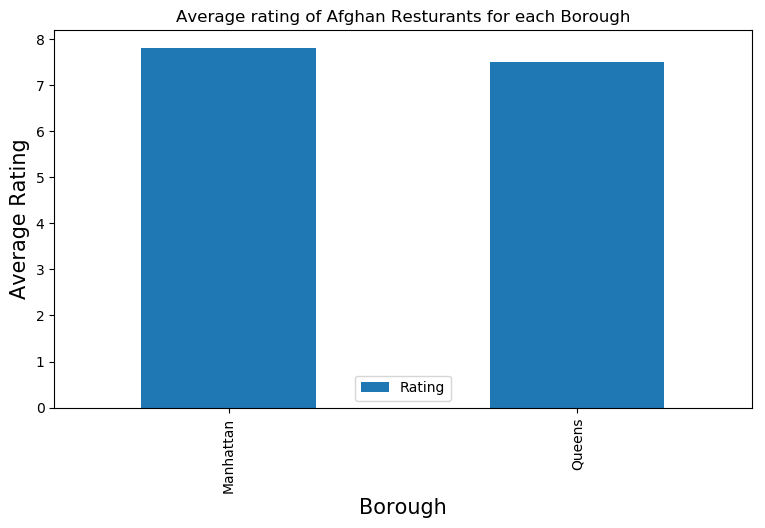

In [33]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Average rating of Afghan Resturants for each Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Average Rating', fontsize=15)
#giving a bar plot
afghan_rest_stats_ny.groupby('Borough').mean()['Rating'].plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [36]:
#the following code is unecassary for this small a dataframe, but it is very useful if they were more restaurants
#For such a small number of restaurants we can also write it 
#as ny_neighborhood_stats=afghan_rest_stats_ny[['Neighborhood',' Average Rating']]
ny_neighborhood_stats=afghan_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']

In [37]:
ny_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head()

,Neighborhood,Average Rating
0,Lenox Hill,7.8
1,Ravenswood,7.7
2,Utopia,7.3


We will consider all the neighborhoods with average rating greater or equal 7.5 to visualize on map



In [40]:
ny_neighborhood_stats=ny_neighborhood_stats[ny_neighborhood_stats['Average Rating']>=7.5]
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,ny_data, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]


In [41]:
ny_neighborhood_stats


,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Manhattan,Lenox Hill,40.768113,-73.958860,7.8
1,Queens,Ravenswood,40.761705,-73.931575,7.7


Now we will show this data on a map



In [43]:
# create map and display it
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)

In [71]:
# instantiate a feature group for the Description in the dataframe
description = folium.map.FeatureGroup()

# loop through the location and add each to the description feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    description.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

Lets add a new field to dataframe ny_neighborhood_stats for labeling purpose



In [72]:
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'

In [74]:
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map
ny_map.add_child(description)

Now let us visualize all the restaurants

In [76]:
#creating the dataframe which contains the locations
ny_neighborhood_stats=afghan_rest_stats_ny.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
ny_neighborhood_stats.columns=['Neighborhood','Average Rating']
ny_neighborhood_stats=pd.merge(ny_neighborhood_stats,ny_data, on='Neighborhood')
ny_neighborhood_stats=ny_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
ny_map = folium.Map(location=geo_location('New York'), zoom_start=12)

# instantiate a feature for the description in the dataframe
description = folium.map.FeatureGroup()

# loop through the locations and add each to the description feature group
for lat, lng, in ny_neighborhood_stats[['Latitude','Longitude']].values:
    description.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [77]:
#adding a column label fro description
ny_neighborhood_stats['Label']=ny_neighborhood_stats['Neighborhood']+', '+ny_neighborhood_stats['Borough']+'('+ny_neighborhood_stats['Average Rating'].map(str)+')'
# add pop-up text to each marker on the map
for lat, lng, label in ny_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(ny_map)        
# add incidents to map
ny_map.add_child(description)

### Conclusion
Ravenswood(Queens), Lenox Hill(Manhattan) are some of the best neighborhoods for Afghan cuisine.
Utopia(Queens) is an Afghan Restaurant with the lowest rating.
Queens have potential Afghan Resturant Market(As Queens has a couple of restaurants that are succesful but yet not rated very highly)
Manhattan is the best place to stay if you prefer Afghan Cuisine.


### Limitations

The ranking is purely on basis of rating of resturants
The accuracy of data depends purely depends on the data provided by FourSquare